## Setup

In [9]:
import numpy as np
import pandas as pd
import math
import statistics
from datetime import datetime as dt
import monthdelta as md
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import raw data

In [10]:
data = pd.read_csv("loans_2007.csv")

## Data cleaning

### Explore raw data

#### Data quantity

In [11]:
print("There are {} rows and {} columns".format(data.shape[0], data.shape[1]))

There are 42537 rows and 52 columns


In [12]:
print("Number of unique values by column:")
display(data.nunique())

Number of unique values by column:


id                            42537
member_id                     42535
loan_amnt                       898
funded_amnt                    1051
funded_amnt_inv                9242
term                              2
int_rate                        394
installment                   16459
grade                             7
sub_grade                        35
emp_title                     30658
emp_length                       11
home_ownership                    5
annual_inc                     5597
verification_status               3
issue_d                          55
loan_status                       9
pymnt_plan                        2
purpose                          14
title                         21253
zip_code                        837
addr_state                       50
dti                            2894
delinq_2yrs                      12
earliest_cr_line                530
inq_last_6mths                   28
open_acc                         44
pub_rec                     

#### Data quality

In [13]:
print("Columns with nulls:")
num_nulls = data.isnull().sum()
display(num_nulls[num_nulls > 0])

Columns with nulls:


member_id                        2
loan_amnt                        2
funded_amnt                      2
funded_amnt_inv                  2
term                             2
int_rate                         2
installment                      2
grade                            2
sub_grade                        2
emp_title                     2628
emp_length                    1114
home_ownership                   2
annual_inc                       6
verification_status              2
issue_d                          2
loan_status                      2
pymnt_plan                       2
purpose                          2
title                           15
zip_code                         2
addr_state                       2
dti                              2
delinq_2yrs                     31
earliest_cr_line                31
inq_last_6mths                  31
open_acc                        31
pub_rec                         31
revol_bal                        2
revol_util          

#### Summary statistics

In [14]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,42506.000000,...,42535.000000,42535.000000,42535.000000,42390.0,42535.0,42506.000000,42390.0,42506.000000,41170.000000,42430.000000
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,1.081424,9.343951,...,99.760718,13.858267,2610.756511,0.0,1.0,0.000094,0.0,0.143039,0.045227,0.000024
std,2.795409e+05,7410.938391,7146.914675,7131.686446,208.927216,6.409635e+04,6.726315,0.512406,1.527455,4.496274,...,716.220266,159.360372,4385.636417,0.0,0.0,0.009700,0.0,29.359579,0.208737,0.004855
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,6.000000,...,0.000000,0.000000,211.460000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,9.000000,...,0.000000,0.000000,526.150000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,12.000000,...,0.000000,0.000000,3165.450000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,47.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,1.000000,0.0,6053.000000,2.000000,1.000000


#### Distribution of target variable: loan_status

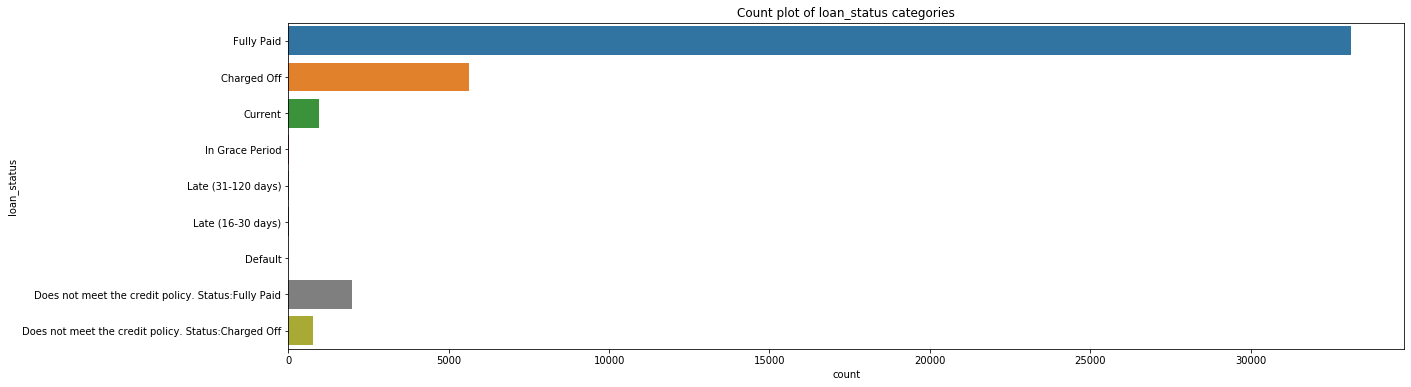

In [15]:
# Count plot of loan status
plt.figure(figsize = (20, 6))
plt.title("Count plot of loan_status categories")
ax = sns.countplot(y = 'loan_status', data = data, orient = "v")

### Data cleaning

#### Keep only rows with loan_status "Fully Paid" (0) or "Charged Off (1)

In [16]:
# Drop rows where loan_status is not "Fully Paid" or "Charged Off"
old_len = len(data)
data = data[data.loan_status.isin(["Fully Paid", "Charged Off"])]
print("Original: {} rows. Dropped: {} rows. Remaining: {} rows.".format(
    old_len, old_len - len(data), len(data)))

# Convert loan_status to binary variable: default = 1 if loan_status = "Charged Off", else default = 0
data["default"] = [
    0 if status == "Fully Paid" else 1 for status in data.loan_status
]
data.drop("loan_status", axis=1, inplace=True)

Original: 42537 rows. Dropped: 3767 rows. Remaining: 38770 rows.


#### Drop duplicate rows

In [17]:
# Drop duplicates
old_len = len(data)
data.drop_duplicates(data.columns[:-3], keep="last", inplace=True)
print("Original: {} rows. Dropped: {} rows. Remaining: {} rows.".format(
    old_len, old_len - len(data), len(data)))

Original: 38770 rows. Dropped: 0 rows. Remaining: 38770 rows.


#### Drop rows with NA values

In [18]:
# Drop duplicates
old_len = len(data)
data.dropna(how = "any", inplace = True)
print("Original: {} rows. Dropped: {} rows. Remaining: {} rows.".format(
    old_len, old_len - len(data), len(data)))

Original: 38770 rows. Dropped: 3222 rows. Remaining: 35548 rows.


#### Drop columns that contain only 1 unique value

These columns do not add any information to each observation

In [19]:
# Drop columns with only 1 unique value
old_len = len(data.columns)
num_unique = data.nunique()
data.drop(num_unique[num_unique <= 1].index, axis=1, inplace=True)

print(
    "Original: {} columns. Dropped: {} columns. Remaining: {} columns.".format(
        old_len, old_len - len(data.columns), len(data.columns)))

print("Dropped columns:")
for col in num_unique[num_unique <= 1].index:
    print(col)


Original: 52 columns. Dropped: 11 columns. Remaining: 41 columns.
Dropped columns:
pymnt_plan
initial_list_status
out_prncp
out_prncp_inv
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


#### Drop redundant or non-useful columns

Certain columns contain information that are not useful for prediction, or redundant information that has been fully captured by another column.

* `id`: arbitrary number assigned by Lending Club
* `member_id`: same as `id`
* `emp_title`: highly unstructured text data, not useful unless significant cleaning is performed
* `title`: same as `emp_title`
* `zip_code`: redundant since the `addr_state` column already captures all geographical information revealed by the first 3 digits of `zip_code`

In [20]:
# Drop redundant or non-useful columns
drop_cols = ["id", "member_id", "emp_title", "title", "zip_code"]
old_len = len(data.columns)
data.drop(drop_cols, axis = 1, inplace = True)
print(
    "Original: {} columns. Dropped: {} columns. Remaining: {} columns.".format(
        old_len, old_len - len(data.columns), len(data.columns)))

Original: 41 columns. Dropped: 5 columns. Remaining: 36 columns.


#### Drop columns which contain information not available at application

This model aims to predict, at the point of loan application, whether a borrower would eventually default. Certain information would not be available at the point of loan application and may introduce lookahead bias and/or cause overfitting. Columns with such information are listed below, and will be removed.

* `funded_amnt` and `funded_amnt_inv`: only known after the loan has already been funded
* `total_pymnt` and `total_pymnt_inv`: only known after the loan has started to be paid off
* `total_rec_prncp`, `total_rec_int`, and `total_rec_late_fee`: only known after the loan has started to be paid off
* `recoveries` and `collection_recovery_fee`: only known after the loan has defaulted
* `last_pymnt_d` and `last_pymnt_amnt`: only known after the loan has started to be paid off
* `last_credit_pull_d`: only known after the loan has already been funded
* `grade` and `sub_grade`: assigned by Lending Club after credit scoring, but not available at the point of application
* `int_rate`: depends on `sub_grade`
* `installment`: depends on `int_rate`

One particular column, `issue_d`, also contains information not available at application time (issue date is only known after funding has completed). However, according to [Lending Club](https://help.lendingclub.com/hc/en-us/articles/215492738-How-long-does-it-take-to-get-approved-), an average application takes around 7 days to be approved and funded. Thus the deviation between issue date and application date is likely to be small. Instead of removing the column, we can thus use `issue_d` as an approximate for time of application, which might contain useful information.

In [21]:
# Drop columns with information not available at origination
drop_cols = [
    "funded_amnt", "funded_amnt_inv", "total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int",
    "total_rec_late_fee", "recoveries", "collection_recovery_fee",
    "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", 
    "grade", "sub_grade", "int_rate", "installment"
]

old_len = len(data.columns)
data.drop(drop_cols, axis=1, inplace=True)
print(
    "Original: {} columns. Dropped: {} columns. Remaining: {} columns.".format(
        old_len, old_len - len(data.columns), len(data.columns)))


# Use issue date as proxy for application time
data.rename({"issue_d": "app_time"}, axis = 1, inplace = True)
data["app_time"] = pd.to_datetime(data.app_time.astype(str), format = "%b-%y")

Original: 36 columns. Dropped: 16 columns. Remaining: 20 columns.


#### Re-format numeric columns

Some numeric columns, e.g `term`, `revol_util` are formatted as text, and need to be re-formatted to float or integer type. Column `empl_length` contains inherently numeric data but is treated as categorical, thus we re-convert it to numeric type. 

In [22]:
# Re-format numeric columns
data.term = [int(str(term).strip().split(" ")[0]) for term in data.term]
data.revol_util = [float(str(util[:-1])) for util in data.revol_util]

# Map employment length to integers: < 1 year is mapped to 0, >= 10 is mapped to 10
data["emp_length"] = ["0 year" if length == "< 1 year" 
                      else "10 years" if length == "10+ years"
                      else length for length in data.emp_length]

data["emp_length"] = [int(str(length).split(" ")[0]) for length in data.emp_length]

## Data visualization

#### Univariate distribution of numeric columns

Observations:
* Many numeric columns appear to be right-skewed or resemble a lognormal distribution, e.g `loan_amnt`, `emp_length`, `open_acc`, `total_acc`, `revol_bal`, etc.
* Some columns may potentially be highly correlated, e.g: `open_acc` and `total_acc`. 
* `Annual_income` appears to contain some extreme right ouliers. 

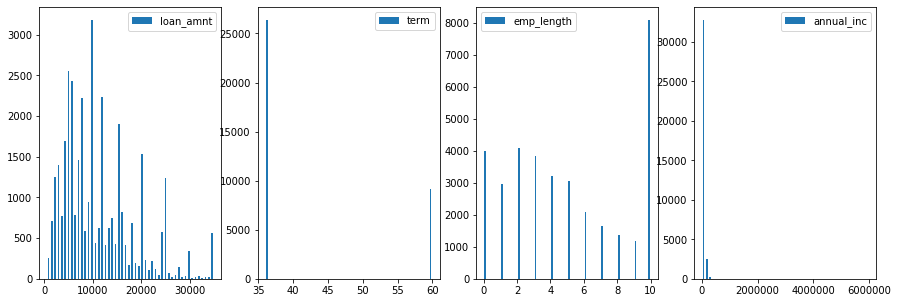

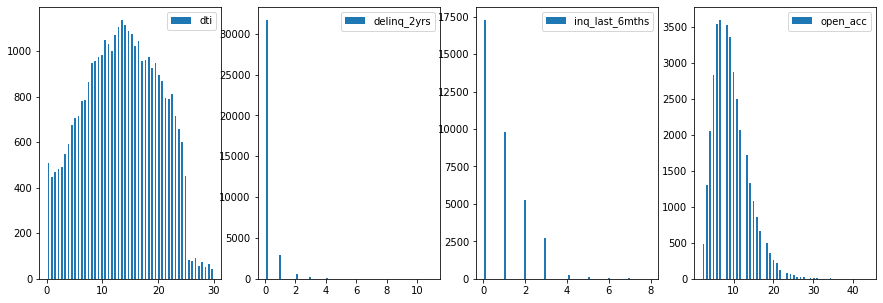

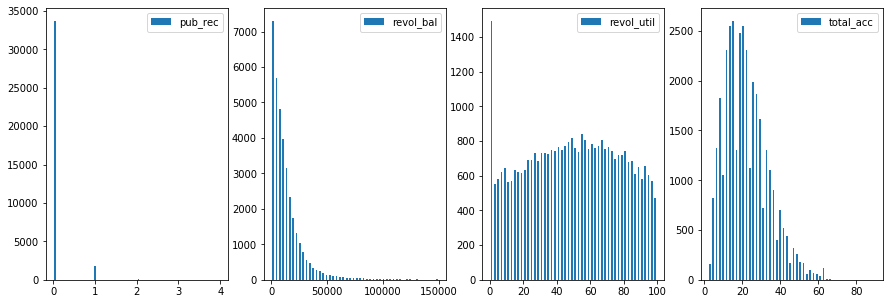

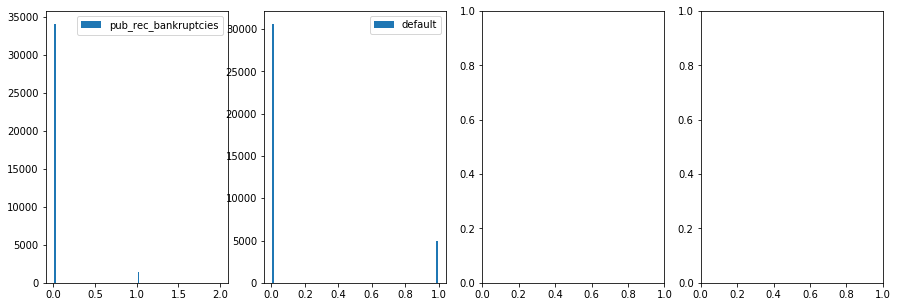

In [23]:
features = data._get_numeric_data().columns

for i in range(len(features)):
    if i % 4 == 0:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
        ax1.hist(data[features[i]], bins = 50, rwidth = 0.5, label=features[i])
        ax1.legend(loc = "best")
    elif i % 4 == 1:
        ax2.hist(data[features[i]], bins = 50, rwidth = 0.5, label=features[i])
        ax2.legend(loc = "best")
    elif i % 4 == 2:
        ax3.hist(data[features[i]], bins = 50, rwidth = 0.5, label=features[i])
        ax3.legend(loc = "best")
    elif i % 4 == 3:
        ax4.hist(data[features[i]], bins = 50, rwidth = 0.5, label=features[i])
        ax4.legend(loc = "best")
    
        
plt.show()

Looking at annual income without the outliers (the top 1% and bottom 1% is winsorized), the data appears to resemble a lognormal distribution as well.

(array([ 759.,  631., 1388., 1668., 2020., 2199., 2424., 1702., 2411.,
        2212., 2212., 1803., 1544., 1808.,  817., 1237., 1150.,  920.,
         779.,  902.,  469.,  312.,  482.,  345.,  562.,  330.,  302.,
         186.,   91.,  248.,  104.,  232.,   85.,  138.,   66.,   32.,
          88.,   81.,   95.,   49.,   36.,   27.,   11.,  126.,   17.,
          21.,   13.,   20.,   30.,  364.]),
 array([ 15120. ,  19417.6,  23715.2,  28012.8,  32310.4,  36608. ,
         40905.6,  45203.2,  49500.8,  53798.4,  58096. ,  62393.6,
         66691.2,  70988.8,  75286.4,  79584. ,  83881.6,  88179.2,
         92476.8,  96774.4, 101072. , 105369.6, 109667.2, 113964.8,
        118262.4, 122560. , 126857.6, 131155.2, 135452.8, 139750.4,
        144048. , 148345.6, 152643.2, 156940.8, 161238.4, 165536. ,
        169833.6, 174131.2, 178428.8, 182726.4, 187024. , 191321.6,
        195619.2, 199916.8, 204214.4, 208512. , 212809.6, 217107.2,
        221404.8, 225702.4, 230000. ]),
 <a list of 50 P

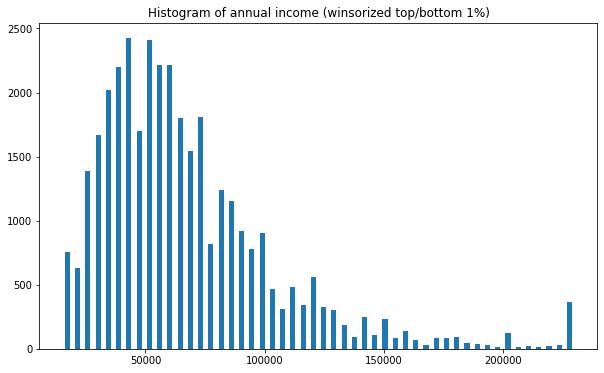

In [24]:
from scipy.stats.mstats import winsorize
income_winsorized = winsorize(data.annual_inc, limits = (0.01, 0.01), inplace = False)
plt.figure(figsize = (10, 6))
plt.title("Histogram of annual income (winsorized top/bottom 1%)")
plt.hist(income_winsorized, bins = 50, rwidth = 0.5, label = "Annual Income")

#### Target variable distribution

The target variable is heavily imbalanced towards the non-defaults. Model training needs to account for this distribution, otherwise it is likely to result in models with high accuracy but low recall (high accuracy can be achieved trivially by predicting all as non-defaults). 

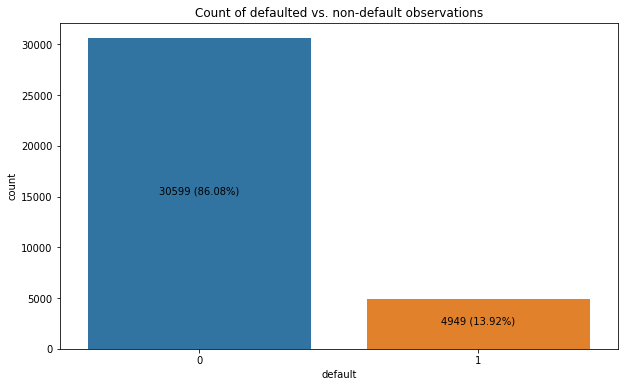

In [25]:
# Count plot of default status
plt.figure(figsize = (10, 6))
plt.title("Count of defaulted vs. non-default observations")
ax = sns.countplot(x = 'default', data = data)

# Display the absolute count and percentage of total loans in each category
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height / 2,
            '{} ({}%)'.format(height, round(100 * height / len(data), 2)),
            ha = "center")

#### Monthly loan count over time

Increasing trend in number of loans applied for each month, showing the increasing popularity of Lending Club as an avenue to access personal credit. 

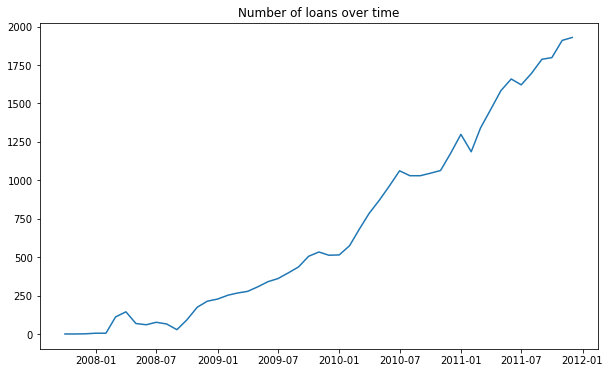

In [26]:
# Plot monthly loan count over time
num_loans_by_time = data.groupby("app_time")["default"].count()
plt.figure(figsize = (10, 6))
plt.title("Number of loans over time")
plt.plot(num_loans_by_time)

#### Monthly average default rate over time

Excluding an abnormally high period at the start, average default rate seems to remain stable at around 20% between 2007 and 2011. Unsurprisingly, given the steady increase in monthly loan count and stable default rate, total defaults increase steadily over time as well.

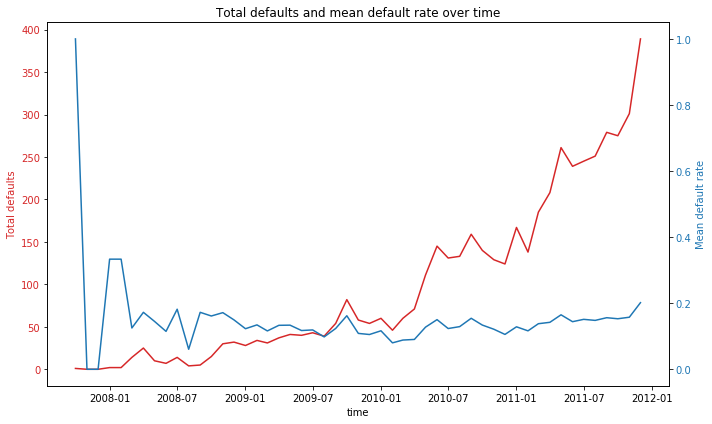

In [27]:
# Default rate over time
total_default = data.groupby("app_time")["default"].sum()
mean_default_rate = data.groupby("app_time")["default"].mean()

fig, ax1 = plt.subplots(figsize = (10, 6))

plt.title("Total defaults and mean default rate over time")
ax1.set_xlabel('time')
ax1.set_ylabel('Total defaults', color = 'tab:red')
ax1.plot(total_default, color = 'tab:red')
ax1.tick_params(axis = 'y', labelcolor = 'tab:red')

ax2 = ax1.twinx()  

ax2.set_ylabel('Mean default rate', color = 'tab:blue')  
ax2.plot(mean_default_rate, color = 'tab:blue')
ax2.tick_params(axis = 'y', labelcolor = 'tab:blue')

fig.tight_layout() 
plt.show()

#### Average loan amount by purpose

Loans for business were on average the highest among all documented purposes, followed by loans for housing needs (house purchase or home improvement) and financial needs (debt consolidation and credit cards). On the other end of the spectrum, discretionary expenses like vacation tend to have the lowest loan amounts.

<BarContainer object of 14 artists>

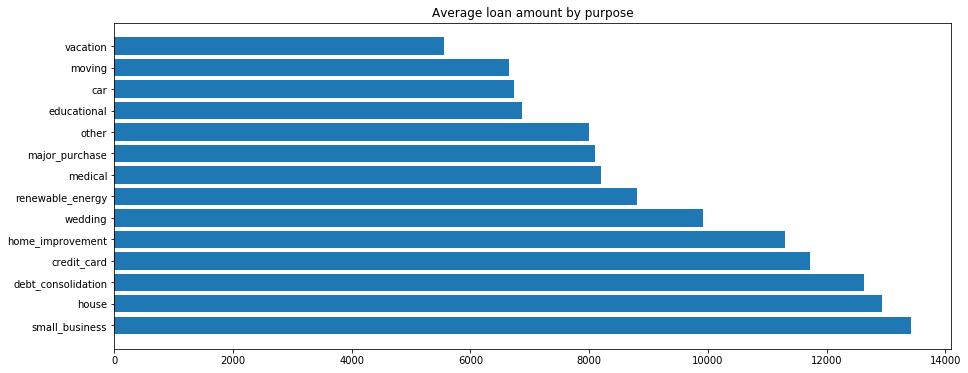

In [28]:
loan_by_purpose = data.groupby("purpose")["loan_amnt"].mean().sort_values(ascending=False)
plt.figure(figsize = (15, 6))
plt.title("Average loan amount by purpose")
plt.barh(width = loan_by_purpose, y = loan_by_purpose.index)

#### Visualising default rate by state

States with highest default rates appear to be concentrated in the West Coast (e.g California), as well as South East region. Central states appear less likely to default.

In [29]:
import folium
from IPython.display import HTML


default_by_state = pd.DataFrame(data.groupby("addr_state")["default"].mean()).reset_index()
state_geo = r'https://gist.githubusercontent.com/datadave/108b5f382c838c3963d7/raw/3036216d894d49205948dbbfd562754ef3814785/us-states.json'

map = folium.Map(location=[40, -100], zoom_start=4)

map.choropleth(geo_data=state_geo, data=default_by_state,
             columns=['addr_state', 'default'],
             key_on='feature.id',
             threshold_scale = [0, 0.03, 0.06, 0.09, 0.12,
                                0.15, 0.18, 0.21, 0.24], 
             fill_color="YlOrRd", fill_opacity=0.75, line_opacity=0.5, 
             legend_name='default rate') 
map

## Feature engineering

#### Re-format datetime columns as time distance relative to a reference time point

Datetime columns cannot be passed directly as features into a machine learning model. We thus re-format each datetime column as the time distance to a reference time point, i.e number of days / months / years passed since the reference point. 

Application time, `app_time`, is re-formatted as the number of months passed since January 2007, which is the start of this dataset.

Earliest credit line, `earliest_cr_line`, is re-formatted as the time distance (in months) to the application time. This potentially extracts more useful information such as: "How long has the earliest credit line been in place, at the point of application?". 

In [30]:
# Re-format earliest_cr_line as time distance relative to application time
data["earliest_cr_line"] = pd.to_datetime(data["earliest_cr_line"],
                                          format = "%b-%y")

data["earliest_cr_line"] = [
    md.monthmod(dt.date(data.iloc[i]["earliest_cr_line"]),
             dt.date(data.iloc[i]["app_time"]))[0].months
    for i in range(len(data))
]


# Re-format app_time as time distance relative to January 2007 (start of dataset)
ref_date = dt.date(dt(2007, 1, 1))

data["app_time"] = [
    md.monthmod(ref_date, dt.date(data.iloc[i]["app_time"]))[0].months
    for i in range(len(data))
]

#### Convert categorical columns to dummy variables

Column `addr_state` may contain useful information, but there are too many discrete values and we'd need to add too many dummy variables columns to use it for classification. The column is thus dropped instead.  

In [31]:
# Drop add_state column:
data.drop("addr_state", axis = 1, inplace = True)

# Map verification status to 0 or 1
data["verification_status"] = [0 if status == "Not Verified" else 1 for status in data.verification_status]

# Convert "home_ownership" and "purpose" to dummy variables
dummy_cols = ["home_ownership", "purpose"]
data = pd.concat([data, pd.get_dummies(data[dummy_cols])], axis = 1)
data.drop(dummy_cols, axis = 1, inplace = True)

For each categorical variable converted to dummies, i.e `home_ownership` and `purpose`, one of the original categories must be removed to avoid multicollinearity issues, which would distort coefficients of linear models. 

In [32]:
# Remove one category of dummy variables
data.drop(["home_ownership_OTHER", "purpose_other"], axis =1, inplace = True)

## Model training

In [33]:
# Reorganize target variable to the end of dataframe
data["default2"] = data["default"]
data.drop("default", axis = 1, inplace = True)
data.rename({"default2": "default"}, axis = 1, inplace = True)

### Train/test split

Train-test split must be done before feature selection to avoid using information from the eventual test set during the feature selection process, which may introduce unfair bias. We will use a stratified train-test split with 80% of the data in the training set, and 20% in the test set. As the dataset is highly imbalanced, a stratified split ensures that the proportion of defaults in the train and test set are similar.  

In [34]:
# Extract X and y columns:
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 0)

### K-fold cross-validation

Instead of a single train-test split, model performance can be better estimated using a technique called cross validation. In one popular approach, K-fold cross validation, the training set is further split into K equal non-intersecting, complementary subsets. In each iteration of training, the model can be trained on K-1 of the subsets, and validated on the remaining one (not used in training). The validation results from these K iterations can be averaged out to give a more robust, less biased estimate of model performance than in a single train-test split. 

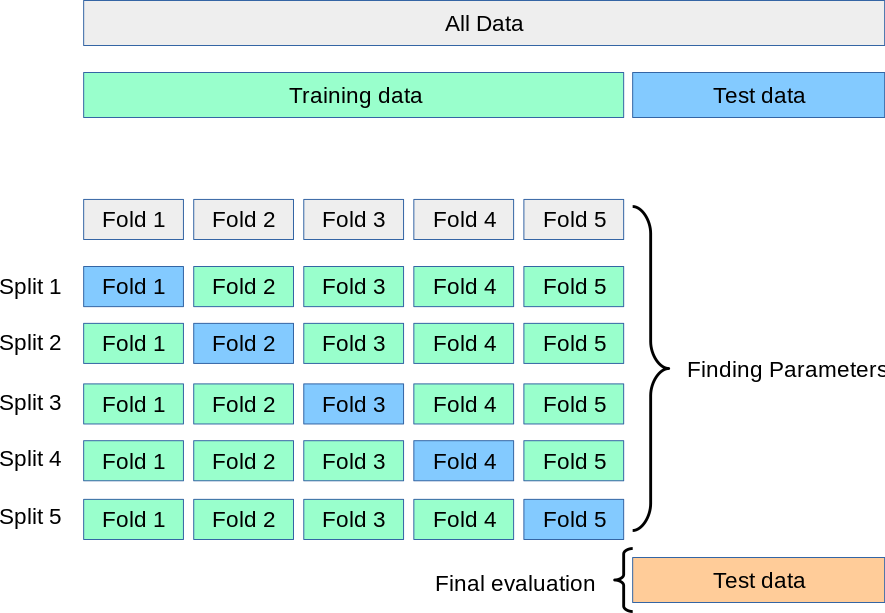

#### Generate K folds from training set

We select K = 5 for cross-validation, and each CV fold is generated using a stratified split similar to the train-test split earlier. This is to ensure that the ratio of defaults to non-defaults remain the same in our train and validation sets.

In [35]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, random_state = 0)
skf.split(X_train, y_train)

X_train_train, X_validate = [], []
y_train_train, y_validate = [], []

for train_index, validate_index in skf.split(X_train, y_train):
    X_train_train.append(X_train.iloc[list(train_index)])
    X_validate.append(X_train.iloc[list(validate_index)])
    y_train_train.append(y_train.iloc[list(train_index)])
    y_validate.append(y_train.iloc[list(validate_index)])

#### Define function to train and score candidate models over cross validation folds

Some Machine Learning algorithms, such as Support Vector Machines (SVM) or regression with regularization, are sensitive to the scale of input features. These algorithms may produce biased models when features are of vastly different scales. When such models are explored, we will address the feature scale issue by standardizing each feature against feature mean and feature standard deviation during the training phase. 

Most classification models are also prone to bias when trained on heavily imbalanced datasets. A native approach exists to address this problem and improve models' robustness, by increasing the penalty for misclassifying the minority class (default). This penalty is inversely proportional to the proportion of the minority class in the training sample. Thus if defaults make up only 2% of the training sample, a false negative prediction is weighted as 50 times more than a false positive prediction.

We evaluate models using 3 different metrics: precision, recall, and F5 score. Precision refers to the proportion of predicted defaults that turn out to actually default. Recall refers to the proportion of actual defaults correctly predicted. F5 score is a composite metric that takes into account both precision and recall, but weighs recall 5 times as much as precision. We give more weight to recall as we recognize that in the context of default prediction, a false negative prediction (i.e wrongly predicting a default as non-default) is likely to be significantly more costly than a false positive one (which may only result in a premature sell-off and lost potential interests). 


In [36]:
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix

def model_training(classifier, standardize=True):
    results = pd.DataFrame(columns=["Fold", "Precision", "Recall", "F5"])

    for i in range(5):
        X_tr, X_val = X_train_train[i], X_validate[i]
        y_tr, y_val = y_train_train[i], y_validate[i]

        # Standardize features in train and validation samples
        if standardize:
            train_mean, train_std = X_tr.mean(), X_tr.std()
            X_tr = (X_tr - train_mean) / train_std
            X_val = (X_val - train_mean) / train_std
            
        # Fit classifier with training data
        classifier.fit(X_tr, y_tr)

        # Make predictions based on validation sample
        y_pred = classifier.predict(X_val)

        # Record validation performance
        pre = precision_score(y_val, y_pred)
        rcl = recall_score(y_val, y_pred)
        f5 = fbeta_score(y_val, y_pred, beta=5)

        results = results.append(pd.DataFrame(
            {
                "Fold": i + 1,
                "Precision": pre,
                "Recall": rcl,
                "F5": f5
            },
            index=[0]),
                                 ignore_index=True)

    results = results.append(pd.DataFrame(results.mean()).T, ignore_index=True)
    results.at[5, "Fold"] = "Average"

    return results

### Candidate model 1: Random Forest

Decision trees-based models such as Random Forest are typically not sensitive to feature scales, thus we require no standardization here.

In [37]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, 
                                     max_features = None, bootstrap = True, 
                                     max_depth=None, random_state=0, n_jobs = -1, 
                                     class_weight = "balanced")

brf_results = model_training(brf, standardize = False)
brf_results

,Fold,Precision,Recall,F5
0,1,0.199853,0.688131,0.629023
1,2,0.193136,0.667929,0.610231
2,3,0.202619,0.703283,0.642246
3,4,0.192322,0.664141,0.606878
4,5,0.198932,0.706700,0.643524
5,Average,0.197373,0.686037,0.626381


### Candidate model 2: Support Vector Machines (SVM)

Support Vector Machine (SVM) is a linear classifier, which represents observations as points in a high-dimensional space and demarcate them with a boundary, so that observations of different categories are as separated as possible. New observations are then mapped into that same space and predicted to belong to a category based on the side of the boundary on which they fall.

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

svm = BaggingClassifier(LinearSVC(class_weight='balanced',
                                      C=1.0,
                                      random_state=0),
                            max_samples=0.1,
                            n_estimators=10,
                            bootstrap=False,
                            n_jobs=-1)

svm_results = model_training(svm, standardize = True)
svm_results

,Fold,Precision,Recall,F5
0,1,0.233135,0.593434,0.560139
1,2,0.228571,0.565657,0.535294
2,3,0.241856,0.618687,0.583708
3,4,0.228686,0.575758,0.544003
4,5,0.233735,0.613148,0.577117
5,Average,0.233197,0.593337,0.560052


### Candidate model 3: Logistic Regression (with L1 regularization)

Logistic regression models attempt to fit a multivariate linear regression equation of $log(\frac{P(default)}{P(non-default})$ against predictors. Regularization applies penalties on the coefficients of the fitted regression model, in order to avoid using too many predictors which may cause overfitting. In L1 regularization models such as Lasso, penalties grow with the absolute value of the coefficients. 

As feature coefficients are affected by their scale, regularized regression models require features to be brought to the same scale before fitting a model. We perform the same standardization steps as applied in our SVM model earlier.

In [39]:
from sklearn.linear_model import LogisticRegression
l1 = LogisticRegression(penalty = 'l1', n_jobs = -1, class_weight = "balanced")

l1_results = model_training(l1, standardize = True)
l1_results

,Fold,Precision,Recall,F5
0,1,0.230291,0.608586,0.572420
1,2,0.226057,0.587121,0.553141
2,3,0.235488,0.630051,0.591907
3,4,0.225760,0.590909,0.556302
4,5,0.232300,0.634640,0.595004
5,Average,0.229979,0.610261,0.573755


### Model selection

Comparing the candidate models' validation performance, we identified Balanced Random Forest as the best performing model, with slightly lower precision but much higher recall and F5 score than SVM and L1 Logistic Regression. As mentioned, we place higher importance on recall over precision as false negative predictions are likely much more costly than false positive ones.

In [40]:
combined_results = pd.concat([
    brf_results.iloc[-1],
    svm_results.iloc[-1],
    l1_results.iloc[-1],
], axis=1).iloc[1:]

combined_results.columns = ["BRF", "SVM", "L1 Logit"]
combined_results

,BRF,SVM,L1 Logit
Precision,0.197373,0.233197,0.229979
Recall,0.686037,0.593337,0.610261
F5,0.626381,0.560052,0.573755


### Feature selection: removing unimportant variables

Before training our selected model, Balanced Random Forest, on the full training dataset, we perform feature selection to obtain a more compact model and reduce chances of overfitting.

A random forest is a collection of decision trees. In a decision tree, every node is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. Thus when training a tree, it can be computed how much each feature decreases the impurity in a tree (the more the impurity decreases, the more important the variable). For a forest, the impurity decrease from each feature can be averaged over all trees and the features are ranked according to this measure.

We compute each feature's importance in each cross-validation fold, and rank the variables by their average feature importance. Least important features are removed.

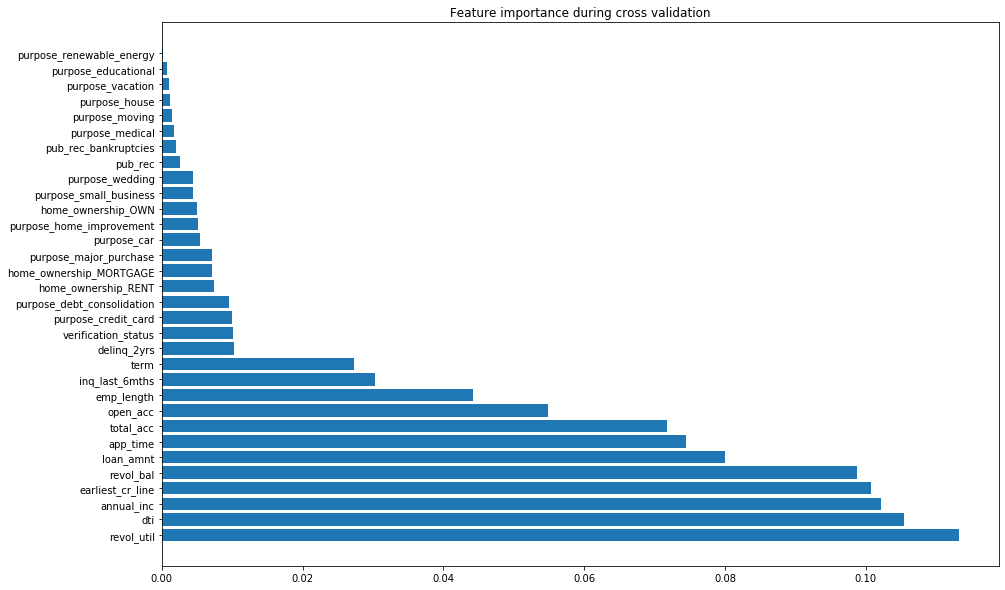

In [41]:
# Compute feature importance in each cross-validation fold
feature_importance = pd.DataFrame()

for i in range(5):
    X_tr, y_tr = X_train_train[i], y_train_train[i]
    brf.fit(X_tr, y_tr)
    feature_importance = feature_importance.append(pd.DataFrame(brf.feature_importances_).T, ignore_index = True)

feature_importance.columns = X_train.columns

# Compute the average importance over 5 folds
feature_importance = pd.DataFrame(feature_importance.mean(), columns = ["Mean importance"]).sort_values(by = "Mean importance", ascending = False)

# Cumulative importance of features
feature_importance["Cumulative"] = feature_importance["Mean importance"].cumsum()

# Plot feature importance
plt.figure(figsize = (15, 10))
plt.barh(width = feature_importance["Mean importance"], y = feature_importance.index)
plt.title("Feature importance during cross validation")
plt.show()

There appears to be a significant drop off from `term` to `delinq_2yrs`. We thus select the cutoff at 0.02, and remove all variables with mean importance less than the cutoff.

In [42]:
# Drop unimportant features
drop_cols = list(feature_importance[feature_importance["Mean importance"] < 0.02].index)

### Train selected model on full training set and validate on test set

Our final model obtains a good recall metric of around 70%. However, it appears to be too strict and classified several non-defaults as defaults, which results in poor precision.

In [43]:
X_train = X_train.drop(drop_cols, axis = 1)
final_model = brf.fit(X_train, y_train)

In [44]:
X_test = X_test[X_train.columns]
y_pred = final_model.predict(X_test)

pre = precision_score(y_test, y_pred)
rcl = recall_score(y_test, y_pred)
f5 = fbeta_score(y_test, y_pred, beta=5)

results = pd.DataFrame(
        {
            "Precision": pre,
            "Recall": rcl,
            "F5": f5
        },
        index=[0])

results

,Precision,Recall,F5
0,0.199008,0.688889,0.629308


In [47]:
# Confusion matrix of final model
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=["Predicted non-default", "Predicted default"],
             index=["Actual non-default", "Actual default"])

,Predicted non-default,Predicted default
Actual non-default,3375,2745
Actual default,308,682
